# Check SOCP and dot vs coeff

## Check SOCP

Check the functions with simple SOCP problems.

In [4]:
import math
import numpy as np
from exputils.Amat.get import get_Amat_sparse
from exputils.state.random_ket import make_random_quantum_state
from exputils.extent.actual import calculate_extent_actual

In [6]:
# check with handmade cases
for method in ["cvx", "mosek"]: # , "gurobi"]:
    psi = np.array([2.0, 0.0])
    stabilizer_extent, x = calculate_extent_actual(1, psi, method)[:2]
    print(f"{stabilizer_extent=} {x=}")
    assert np.isclose(stabilizer_extent, 2**2)
    assert np.allclose(x, [2, 0, 0, 0, 0, 0], atol=1e-5)

    psi = np.array([0.0, 2.0])
    stabilizer_extent, x = calculate_extent_actual(1, psi, method)[:2]
    print(f"{stabilizer_extent=} {x=}")
    assert np.isclose(stabilizer_extent, 2**2)
    assert np.allclose(x, [0, 2, 0, 0, 0, 0], atol=1e-5)

    psi = np.array([1 / math.sqrt(2), -1j / math.sqrt(2)])
    stabilizer_extent, x = calculate_extent_actual(1, psi, method)[:2]
    print(f"{stabilizer_extent=} {x=}")
    assert np.isclose(stabilizer_extent, 1**2)
    assert np.allclose(x, [0, 0, 0, 0, 0, 1], atol=1e-5)

# check with random states
for n in [1, 2]:
    print(f"{n=}")
    Amat = get_Amat_sparse(n)
    for seed in range(5):
        np.random.seed(seed)
        psi = np.random.rand(2**n) + 1j * np.random.rand(2**n)
        psi /= np.linalg.norm(psi)
        stabilizer_extent_cvx, x1, y1 = calculate_extent_actual(n, psi, "cvx")
        print(f"{stabilizer_extent_cvx=}")
        stabilizer_extent_mosek, x2, y2 = calculate_extent_actual(n, psi, "mosek")
        print(f"{stabilizer_extent_mosek=}")
        assert np.isclose(stabilizer_extent_cvx, stabilizer_extent_mosek, atol=1e-5)
        assert np.max(np.real(np.abs(y1.conj().T @ Amat))) >= 1 - 1e-5
        assert np.max(np.real(np.abs(y2.conj().T @ Amat))) >= 1 - 1e-5
        try:
            stabilizer_extent_gurobi = calculate_extent_actual(n, psi, "gurobi")[0]
            print(f"{stabilizer_extent_gurobi=}")
            assert np.isclose(stabilizer_extent_cvx, stabilizer_extent_gurobi, atol=1e-5)
        except ModuleNotFoundError:
            print("skipped gurobi test (not installed)")

stabilizer_extent=3.99999998445488 x=array([ 1.99999998e+00-5.03483746e-25j, -8.46287399e-24-4.49708188e-24j,
        6.34496899e-09-3.47629552e-24j,  6.34496899e-09+9.86968915e-24j,
        6.34496899e-09+4.02940723e-24j,  6.34496899e-09-9.71076725e-24j])
stabilizer_extent=3.9999999844548775 x=array([ 2.23190575e-23+9.89540529e-24j,  1.99999998e+00-3.70932893e-25j,
        6.34496898e-09+1.12894765e-23j,  2.76698132e-23-6.34496898e-09j,
       -6.34496898e-09+1.08966275e-23j,  2.75380839e-23+6.34496898e-09j])
stabilizer_extent=0.9999999823516529 x=array([ 9.14141454e-09+1.66477406e-23j, -2.06254155e-23-9.14141454e-09j,
        6.46395621e-09-6.46395621e-09j,  3.44284103e-20+1.54194382e-23j,
        6.46395621e-09+6.46395621e-09j,  9.99999974e-01+1.65543069e-22j])
stabilizer_extent=4.000000000100565 x=array([2.00000000e+00+0.j, 0.00000000e+00+0.j, 9.68911744e-12+0.j,
       9.68911744e-12+0.j, 9.68911744e-12+0.j, 9.68911744e-12+0.j])
stabilizer_extent=4.000000000100563 x=array([ 0.0000

## Relation between dot and coeff

It is predicted that dot product is a good indicator for the importance of a stabilizer state in stabilizer extent.
We check this hypothesis by comparing the dot product and the coefficient of the stabilizer state in the stabilizer extent.

  0%|          | 0/36720 [00:00<?, ?it/s]

Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 32              
  Affine conic cons.     : 36720 (110160 rows)
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 110160          
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.02            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  - dual attempts          : 0        

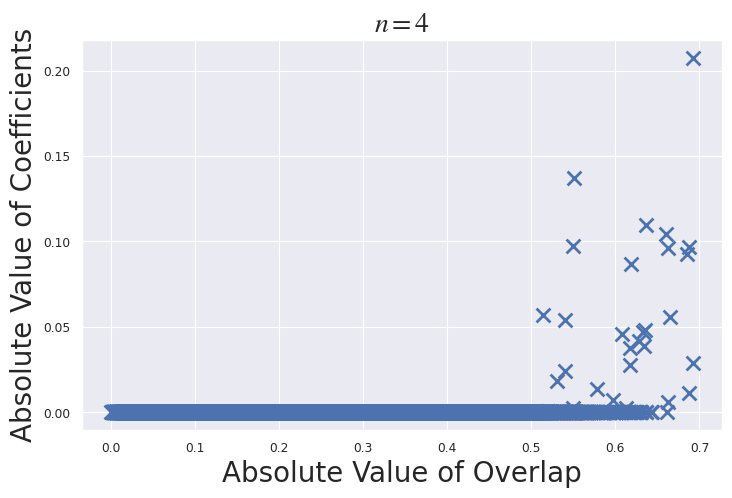

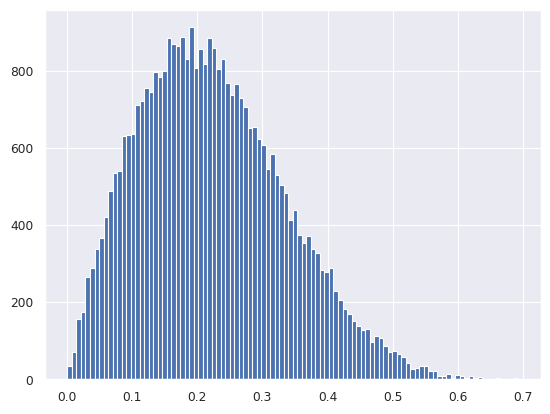

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme("paper")
rc = {"mathtext.fontset": "stix"}
plt.rcParams.update(rc)


def visualize_multiple_Amat(n: int, seed: int):
    plt.figure(figsize=(8, 5))
    n = 4
    psi = make_random_quantum_state("pure", n, seed=seed)
    Amat = get_Amat_sparse(n)
    stabilizer_extent, x, y = calculate_extent_actual(n, psi, "mosek", True)
    dots = psi.conj() @ Amat
    print(f"{stabilizer_extent=}")
    sns.scatterplot(
        x=np.abs(dots),
        y=np.abs(x),
        marker="x",
        s=100,  # marker size
        linewidth=2,  # marker edge width
    )
    plt.title(f"$n = {n}$", fontsize=20)
    plt.xlabel("Absolute Value of Overlap", fontsize=20)
    plt.ylabel("Absolute Value of Coefficients", fontsize=20)
    plt.subplots_adjust(bottom=0.15, left=0.15, right=0.95, top=0.93)
    # plt.savefig(
    #     f"dot_and_coeff_{n_qubit}.png",
    #     dpi=500,
    #     # bbox_inches="tight",
    # )
    # plt.close()
    plt.show()

    plt.hist(np.abs(dots), bins=100)
    plt.show()


visualize_multiple_Amat(4, 0)